In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

X, y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [2]:
#trees built are stored in estimator_

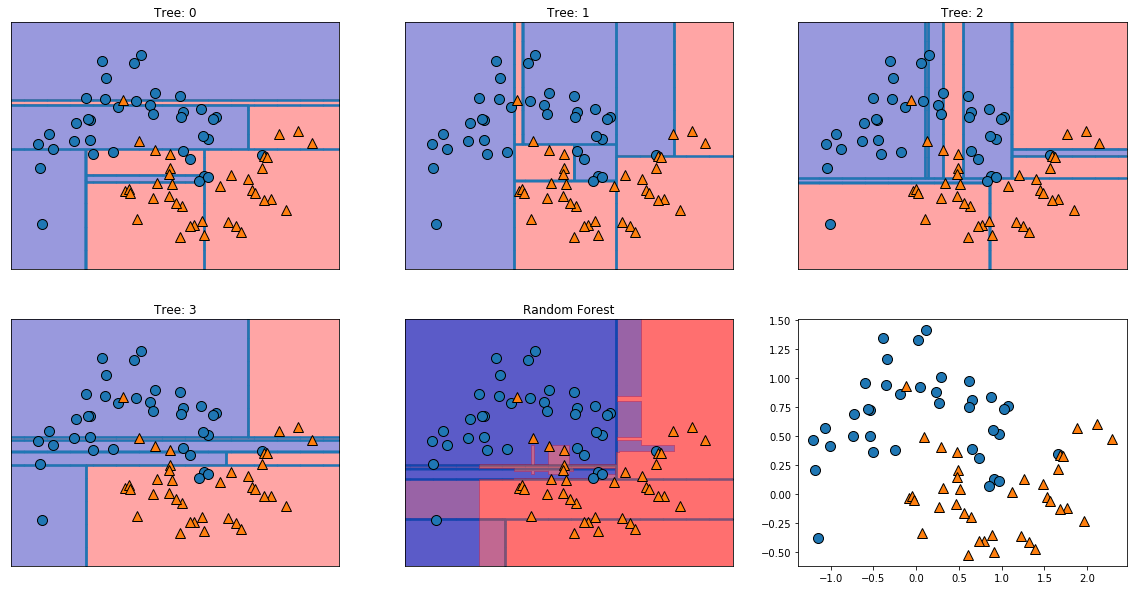

In [5]:
fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree: {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,1], alpha=0.4)

axes[-1,1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

In [7]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

forest=RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("Accuracy train set: {}".format(forest.score(X_train,y_train)))
print("Accuracy test set: {}".format(forest.score(X_test,y_test)))

Accuracy train set: 1.0
Accuracy test set: 0.972027972027972


In [8]:
#wow, better than any of the linear models!
#look into n_jobs parameter to parallel across multiple cores